
# Day 3
batch size 256 lr 1e-3, normed weighted, rotated, cartesian, split ny jet mult (0)

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using Theano backend.


## Options

In [8]:
nJets = '0'
inputPipe, outputPipe = getPreProcPipes(normIn=True)
classModel = 'modelSwish'
varSet = "filtered_rot_cart_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':18, 'compileArgs':compileArgs}

## Import data

In [3]:
trainData = h5py.File(dirLoc + 'train_' + nJets + '.hdf5', "r+")
valData = h5py.File(dirLoc + 'val_' + nJets + '.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 2.745s 


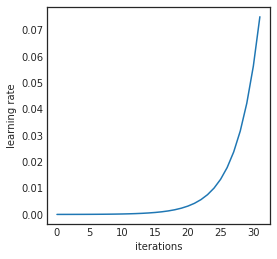

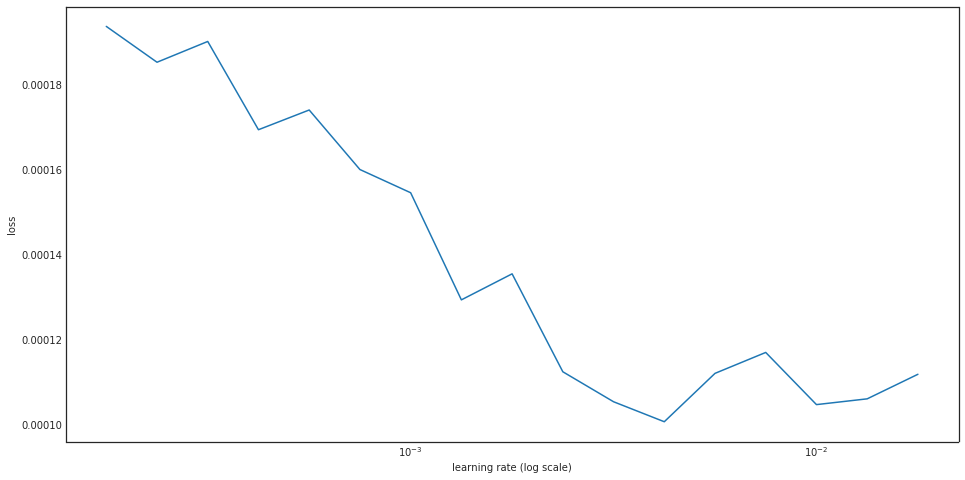

______________________________________



In [9]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

In [10]:
compileArgs['lr'] = 1e-3

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 9.26612878383e-05
2 New best found: 8.33286153509e-05
3 New best found: 8.23319182002e-05
4 New best found: 8.06302773848e-05
5 New best found: 7.98313102502e-05
6 New best found: 7.90650411131e-05
7 New best found: 7.90021117e-05
11 New best found: 7.87894465421e-05
12 New best found: 7.81253287415e-05
13 New best found: 7.81091840372e-05
14 New best found: 7.79700571964e-05
20 New best found: 7.79135822509e-05
22 New best found: 7.76173003435e-05
24 New best found: 7.74125930839e-05
25 New best found: 7.71558994117e-05
38 New best found: 7.71491101148e-05
49 New best found: 7.71213690221e-05
52 New best found: 7.69086129668e-05
57 New best found: 7.68550801737e-05
58 New best found: 7.68332952977e-05
Early stopping after 158 epochs
Score is: {'loss': 7.6833295297739685e-05, 'AUC': 0.10448431232742261, 'wAUC': 0.058613861670104517}
Fold took 56.132s

Running fol

1 New best found: 9.604111478e-05
2 New best found: 8.6591635785e-05
3 New best found: 8.49395342893e-05
4 New best found: 8.21731055749e-05
5 New best found: 8.03589536118e-05
6 New best found: 7.9905140019e-05
7 New best found: 7.97919370921e-05
8 New best found: 7.92771361012e-05
10 New best found: 7.87453278815e-05
11 New best found: 7.83542182019e-05
12 New best found: 7.81195999945e-05
13 New best found: 7.80886117558e-05
14 New best found: 7.7794345972e-05
15 New best found: 7.77870727392e-05
20 New best found: 7.77721750828e-05
23 New best found: 7.73817149496e-05
26 New best found: 7.71763471426e-05
27 New best found: 7.70961029203e-05
28 New best found: 7.70873247343e-05
29 New best found: 7.70419350668e-05
41 New best found: 7.69549394818e-05
47 New best found: 7.68811032252e-05
50 New best found: 7.66920996388e-05
54 New best found: 7.66666275413e-05
55 New best found: 7.66338687262e-05
56 New best found: 7.66263664251e-05
57 New best found: 7.66185034664e-05
59 New best fo

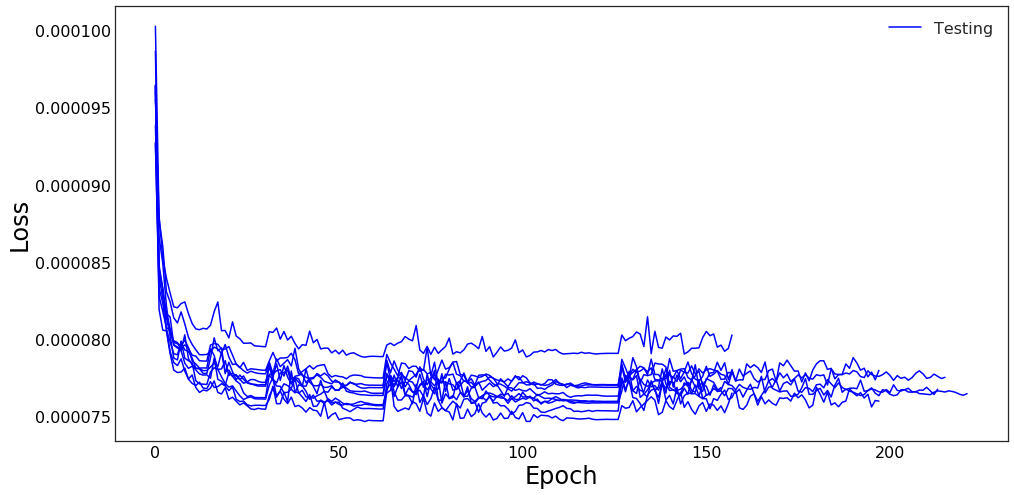

Mean wAUC = 0.0578 +- 0.0005
______________________________________



In [11]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, patience=100, cosAnnealMult=2, trainOnWeights=True, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [12]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [13]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 1 with loss = 7.46775565545e-05
Model 1 is 3 with loss = 7.51450047549e-05
Model 2 is 8 with loss = 7.56716854409e-05
Model 3 is 2 with loss = 7.57391208973e-05
Model 4 is 6 with loss = 7.59581152801e-05
Model 5 is 7 with loss = 7.62431034665e-05
Model 6 is 5 with loss = 7.66455640453e-05
Model 7 is 0 with loss = 7.68332952977e-05
Model 8 is 4 with loss = 7.69619580818e-05
Model 9 is 9 with loss = 7.88412981762e-05


## Response on development data

In [14]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000382372519956s per sample

Predicting batch 2 out of 10
Prediction took 0.000154203285359s per sample

Predicting batch 3 out of 10
Prediction took 0.000158166867481s per sample

Predicting batch 4 out of 10
Prediction took 0.000162104976859s per sample

Predicting batch 5 out of 10
Prediction took 0.000180926055078s per sample

Predicting batch 6 out of 10
Prediction took 0.000156298397212s per sample

Predicting batch 7 out of 10
Prediction took 0.000179497452622s per sample

Predicting batch 8 out of 10
Prediction took 0.000151896291786s per sample

Predicting batch 9 out of 10
Prediction took 0.000192932657771s per sample

Predicting batch 10 out of 10
Prediction took 0.000172339342497s per sample



In [15]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.900160345569, weighted 0.945825854529


## Response on val data

In [16]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000179857895218s per sample

Predicting batch 2 out of 10
Prediction took 0.000174202997724s per sample

Predicting batch 3 out of 10
Prediction took 0.000170896505343s per sample

Predicting batch 4 out of 10
Prediction took 0.000259791331747s per sample

Predicting batch 5 out of 10
Prediction took 0.000164311071704s per sample

Predicting batch 6 out of 10
Prediction took 0.00026587287227s per sample

Predicting batch 7 out of 10
Prediction took 0.000172569587066s per sample

Predicting batch 8 out of 10
Prediction took 0.000267556002429s per sample

Predicting batch 9 out of 10
Prediction took 0.000171499725097s per sample

Predicting batch 10 out of 10
Prediction took 0.000155098150537s per sample



In [17]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.898386237523, weighted 0.944049075656


## Evaluation

### Import in dataframe

In [18]:
def convertToDF(datafile, columns={'gen_target', 'gen_weight', 'pred_class'}, nLoad=-1):
    data = pandas.DataFrame()
    data['gen_target'] = getFeature('targets', datafile, nLoad)
    data['gen_weight'] = getFeature('weights', datafile, nLoad)
    data['pred_class'] = getFeature('pred', datafile, nLoad)
    print len(data), "candidates loaded"
    return data

In [19]:
valData = convertToDF(valData)

19983 candidates loaded


In [20]:
sigVal = (valData.gen_target == 1)
bkgVal = (valData.gen_target == 0)

### MVA distributions

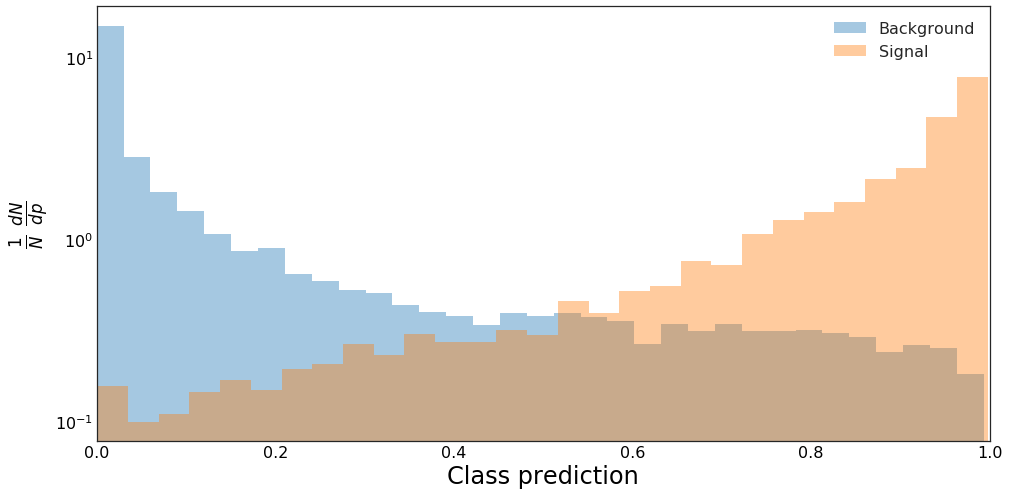

In [21]:
getClassPredPlot([valData[bkgVal], valData[sigVal]], weightName='gen_weight')

In [22]:
amsScan(valData)

[0.97029471397399902, 1.1079173874353596]


[0.43288245074886417,
 0.7640747412598029,
 0.3772732973038329,
 0.31801675077774305,
 0.32527639880566744,
 0.34410966092475065,
 1.069606913212211,
 0.3361487859464714,
 0.9006317495646117,
 0.3157409176003012,
 1.086589004543189,
 0.4427482599577184,
 0.8907154075635328,
 0.37383834483037565,
 0.31793362023380156,
 0.6998214332917102,
 0.3299226551617229,
 0.3959374619042716,
 0.3445071244860112,
 0.7377317716462755,
 0.6345146585075007,
 0.5779969257277674,
 1.0288982969637286,
 0.47661196540624823,
 0.7915857207875888,
 0.8989196561772216,
 0.8455401932259473,
 1.0728073608313535,
 0.5658631923703299,
 0.7148640465865768,
 0.5657168594937158,
 0.7298746266012848,
 0.3884741900237481,
 0.45401617596359817,
 0.5446233909363969,
 0.3812430383838345,
 0.6060168176138548,
 0.40034553255105704,
 0.38369799068480503,
 0.32644218066212927,
 0.3165129892458742,
 0.3169467961511915,
 0.6319704816327059,
 0.3305128328492294,
 0.36464861888408634,
 0.3937976402981291,
 0.34650990006929366,
 0

In [23]:
def scoreTest(ensemble, weights, nJets):
    testData = h5py.File(dirLoc + 'testing_' + nJets + '.hdf5', "r+")
    batchEnsemblePredict(ensemble, weights, testData, ensembleSize=10, verbose=1)

def saveTest(cut, name, nJets):
    testData = h5py.File(dirLoc + 'testing_' + nJets + '.hdf5', "r+")
    
    data = pandas.DataFrame()
    data['EventId'] = getFeature('EventId', testData)
    data['pred_class'] = getFeature('pred', testData)
    
    data['Class'] = 'b'
    data.loc[data.pred_class >= cut, 'Class'] = 's'

    data.sort_values(by=['pred_class'], inplace=True)
    data['RankOrder']=range(1, len(data)+1)
    data.sort_values(by=['EventId'], inplace=True)

    print dirLoc + name + '_test.csv'
    data.to_csv(dirLoc + name + '_test.csv', columns=['EventId', 'RankOrder', 'Class'], index=False)

In [24]:
scoreTest(ensemble, weights, nJets)

Predicting batch 1 out of 10
Prediction took 0.000164216655025s per sample

Predicting batch 2 out of 10
Prediction took 0.000173641217136s per sample

Predicting batch 3 out of 10
Prediction took 0.000198702262931s per sample

Predicting batch 4 out of 10
Prediction took 0.000171121458934s per sample

Predicting batch 5 out of 10
Prediction took 0.000227734554819s per sample

Predicting batch 6 out of 10
Prediction took 0.000169637353095s per sample

Predicting batch 7 out of 10
Prediction took 0.000179761208216s per sample

Predicting batch 8 out of 10
Prediction took 0.000169140854506s per sample

Predicting batch 9 out of 10
Prediction took 0.000181286708079s per sample

Predicting batch 10 out of 10
Prediction took 0.000180750404356s per sample



In [ ]:
saveTest(0.9729418158531189, 'Day_2_Basic_Features_256_1e-3_swish_mult2_200E_normedweighted_rot_cart', nJets)

!kaggle competitions submit -c higgs-boson -f ../Data/Day_2_Basic_Features_256_1e-3_swish_mult2_200E_normedweighted_rot_cart_test.csv -m"Day2"